# Un exemple de système chaotique
Une des particularités d'un système chaotique est de présenter une sensibilité extrême à ses conditions initiales. Cela signifie qu'une
perturbation, aussi faible soit-elle, sur la condition initiale d'un système dynamique aura une conséquence importante sur son évolution
temporelle. C'est ce comportement que l'on va illustrer dans ce notebook.

Pour être précis, nous parlons ici de chaos déterministe, c'est-à-dire du comportement chaotique d'un système dynamique dont les équations
du mouvement sont déterministes : pour une même condition initiale idéale, le système évoluera toujours de la même manière. L'évolution chaotique
d'un système ne tient donc pas à la complexité des équations, la multiplicité des variables, ou encore à l'introduction de paramètres
définis de manière aléatoire, mais bien à la sensibilité extrême aux conditions initiales.

Le système chaotique le plus largement connu est l'équation logistique. C'est une équation extrêmement simple... même si l'apparition d'un
comportement chaotique ne peut résulter que de non-linéarités. Cette équation est celle qui régit l'évolution d'une population,
par exemple celle de certains poissons. Leur reproduction conduit à faire croître leur nombre, mais la quantité limitée de nourriture va
limiter cette croissance.

## Présentation mathématique du problème
On suppose que cette dynamique décrit correctement une population de lapins. On note $n_i$ la population de lapins l'année $i$, et $\alpha$ le nombre de petits par portée (une par an). Alors, $n_{i+1} = \alpha n_i$. Si $\alpha$ est une constante, alors, on obtiendra l'année $p$

$$ n_p = \alpha^p n_0 $$

c'est-à-dire une croissance exponentielle de la population de lapins.

Mais la quantité finie de ressources ainsi que les prédateurs va limiter cette croissance séculaire. Cela se traduit mathématiquement par le fait que $\alpha$ ne puisse plus être une constante, mais est une fonction de $n_i$ ainsi que d'autres paramètres. Si l'on note $r$ le taux de croissance maximal et $n_{\max}$ le nombre maximal de lapins qu'il peut exister (en consommant donc toutes les ressources), alors le coefficient $\alpha$ pourrait s'écrire

$$ \alpha = r \left( 1 - \frac{n_i}{n_{\max}} \right) $$

La forme de l'équation d'évolution de la population devient alors

$$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $$

et peut se réécrire avec la nouvelle variable $x_i = n_i / n_{\max}$

$$ x_{i+1} = r (1-x_i)x_i $$

que l'on appelle « l'équation logistique ». Pour l'étude de cette équation, on introduit la fonction

$$ f(x) = r (1-x) x $$

dont le seul paramètre est donc $r$. Nous allons voir que suivant les valeurs de $r$, le comportement asymptotique de la suite

$$ x_{i+1} = f(x_i) $$

présente un comportement chaotique. $r$ est compris entre 1 et 4.

## Comportement de la suite
Comme expliqué dans le cours *Représentation graphique d'une suite mathématique*, représenter de façon graphique le comportement de la suite
pour $r=2.5$ et $x_0=0.1$. La suite tend-elle vers une limite finie ?

Choisir d'autres valeurs de $r$ comprises entre 2.5 et 4. Que constatez-vous ?

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Rapport entre la population et la population maximale par année')

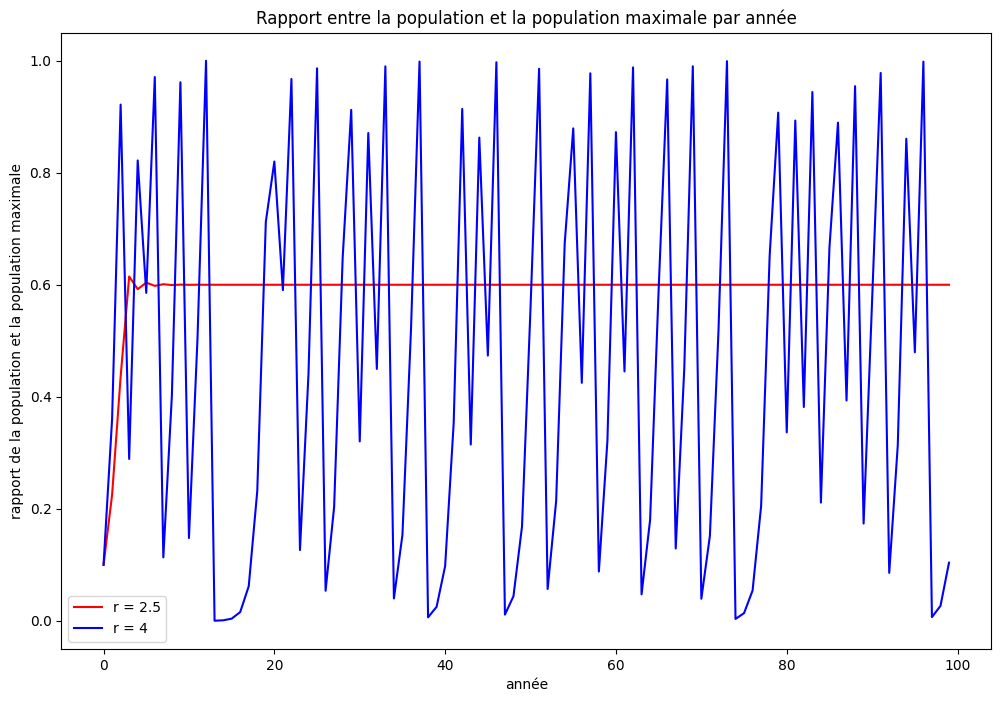

In [10]:
#définition de la fonction 
def f(r, x):
    return r*(1-x)*x

def recurrence (r, x_0, n_itération):
    valeur = [x_0]
    for k in range(n_itération-1):
        x_0 = f(r, x_0)
        valeur.append(x_0)
    return valeur

#suite pour r=2.5
suite_r1 = recurrence(2.5, 0.1, 100)

#suite pour r=4
suite_r2 = recurrence(4, 0.1, 100)

#tracage des courbes
plt.figure(figsize=(12,8))
plt.plot(range(100), suite_r1, label = 'r = 2.5', color = 'r')
plt.plot(range(100), suite_r2, label = 'r = 4', color = 'b')
plt.legend()
plt.ylabel('rapport de la population et la population maximale')
plt.xlabel('année')
plt.title('Rapport entre la population et la population maximale par année')

On constate que lorsque r est égale à 4 la fonction devient chaotique

## Diagramme de bifurcation
On souhaite dans cette partie étudier la limite (lorsqu'elle existe) de la suite des $x_i$ définie par l'équation logistique, de
façon systématique. Plus précisément, on souhaite étudier la manière dont cette limite dépend de la valeur de $r$.

Pour cela, vous allez prendre un grand nombre de valeurs de $r$ comprises entre 2.5 et 4, mais toujours $x_0=0.00001$. Pour
chaque valeur de $r$, calculez les 1000 premiers termes de la suite, et gardez uniquement les 100 derniers termes. Si la limite est
bien définie, ces 100 derniers termes devraient être très semblables, ce qui n'est pas toujours le cas.

Vous allez créer un diagramme de bifurcation. Pour cela il faut tracer sur un graphique :

- pour une valeur de $r$ donnée en abscisses, tracer les 100 derniers termes de la suite en ordonnée (avec des petits points)
- répéter cette opération pour toutes les valeurs de $r$ choisies

Vous devriez obtenir un diagramme qui ressemble à :

![title](./diagramme_bifurcation.png)

Que pouvez-vous en conclure sur la manière dont la limite de l'équation logistique dépend du paramètre $r$ ? Est-ce que le diagramme
de bifurcation dépend de la valeur de $x_0$ ?

Text(0, 0.5, '100 dernier termes de la suite')

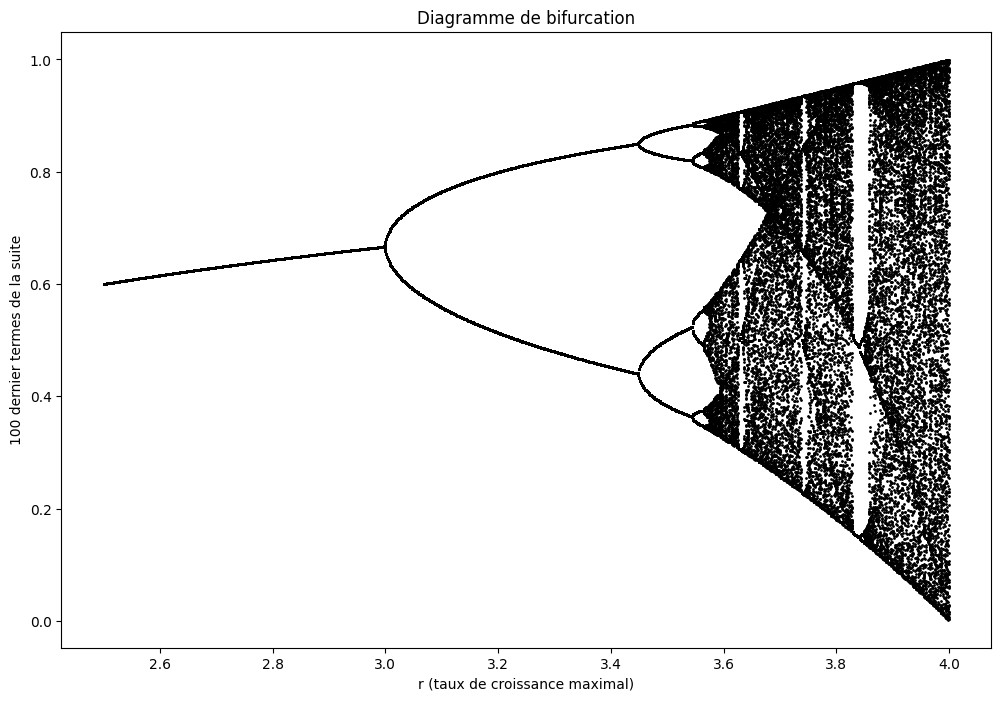

In [11]:
#définition de la fonction qui prend les derniers points 
def recurrence2 (r, x_0, n_itération):
    valeur = [x_0]
    for k in range(n_itération-1):
        x_0 = f(r, x_0)
        valeur.append(x_0)
    derniere_valeur = np.array(valeur[-100:])
    return derniere_valeur

#création du tableau des r possibles
x_0 = 0.00001
n_r = 1000
n_itération = 1000
liste_r = np.linspace(2.5, 4, n_r)

#valeur pour chaque r 
résultat = [recurrence2(r, x_0, n_itération) for r in (liste_r)]

#la liste des r est composé de 1000 élément, la liste résultat est composé de 1000 foix des listes de 100 élément. on multiplie donc par 100 chaque élément de la liste des r
r_dim = []

for i in (liste_r):
    r_dim += [i]*100

#tracage de la courbe 
plt.figure(figsize=(12,8))
plt.scatter(r_dim, résultat, s=1, color ='k')
plt.title('Diagramme de bifurcation')
plt.xlabel('r (taux de croissance maximal)')
plt.ylabel('100 dernier termes de la suite')

## Exposant de Lyapunov
Nous avons dit plus haut que le caractère chaotique d'un système dynamique tient à la manière dont une différence, aussi petite soit-elle,
sur deux conditions initiales va pouvoir conduire à une divergence sévère de leur comportement asymptotique. Mathématiquement, cela
signifie que la distance entre ces deux solutions va augmenter de manière exponentielle.

On cherche une forme en

$$ e^{t \lambda(r)} $$

de cette croissance, sachant qu'elle va dépendre de la valeur de $r$. Lorsque $\lambda$ est une fonction à valeur négative, la
suite associée à l'équation logistique est convergente. À l'inverse, pour les valeurs positives de $\lambda$, la suite diverge.
Cette divergence peut se traduire de plusieurs manières. Comme vous l'avez vu sur le diagramme de bifurcation, suivant les valeurs de
$r$, on peut avoir 1, 2, 4 ou plus limites à la suite des $x_i$.

La manière de calculer cet exposant est due à Aleksander Lyapunov (1857-1918). L'expression de $\lambda(r)$ est

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

Vous allez calculer pour chacune des valeurs de $r$ uniformément distribuées entre 2.5 et 4 la valeur de l'exposant de Lyapunov.
Sur un graphique, vous tracerez un point pour chacun des couples $(r, \lambda)$ que vous avez obtenu. Pour rendre le graphique plus
lisible, vous pourrez tracer un point noir lorsque $\lambda < 0$ et un point rouge lorsque $\lambda > 0$. Vous pourrez aussi
tracer sur votre graphique une ligne horizontale bleue pour $\lambda = 0$ pour marquer la différence entre les valeurs stables et
instables de $\lambda$.

Vous devriez obtenir un graphique qui ressemble à :

![title](./lyapunov.png)

Comparez ce graphique au diagramme de bifurcation. Que pouvez-vous en conclure sur la stabilité de l'équation logistique ?

Text(0, 0.5, 'Lambda')

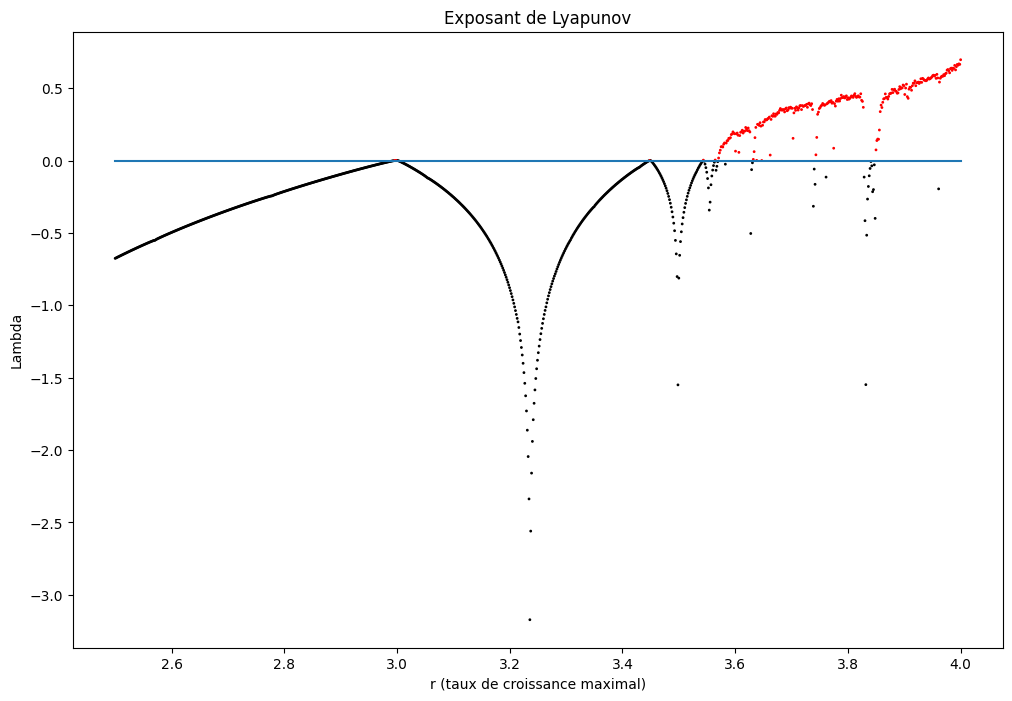

In [15]:
#definition de la dérivé de la fonction 
def F(r, x):
    return np.log(np.abs(r-2*r*x))

n_itération_λ = 1000

#définition de la fonction qui calcul λ 
def λ(r, x_0, n_itération_λ):
    valeur = [x_0]
    for j in range(n_itération_λ -1):
        x_0 = f(r, x_0)
        valeur.append(F(r,x_0))
    alpha = (1/n_itération_λ) * sum(valeur)
    return alpha    

#λ pour chaque r 
n_r_λ = 1000
liste_r_λ = np.linspace(2.5, 4, n_r_λ)
λ = [λ(r, x_0, n_itération) for r in (liste_r_λ)]

#tableau des zero
zero = np.zeros(len(liste_r_λ)) * 0

rouge = ['r'if i > 0 else 'k' for i in λ ]

#tracage de la courbe 
plt.figure(figsize=(12,8))
plt.scatter(liste_r_λ, λ, s=1, color = rouge)
plt.plot(liste_r_λ, zero)
plt.title('Exposant de Lyapunov')
plt.xlabel('r (taux de croissance maximal)')
plt.ylabel('Lambda')